In [ ]:
!pip install -q transformers datasets tensorflow scikit-learn matplotlib --upgrade

***IMDb DistilBERT***

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/datasets/arrow_dataset.py:405: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


tf_model.h5:   0%|          | 0.00/363M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-

Epoch 1/2
1563/1563 [==============================] - 1929s 1s/step - loss: 0.2558 - accuracy: 0.8974 - val_loss: 0.1867 - val_accuracy: 0.9271
Epoch 2/2
1563/1563 [==============================] - 1913s 1s/step - loss: 0.1403 - accuracy: 0.9509 - val_loss: 0.1911 - val_accuracy: 0.9254


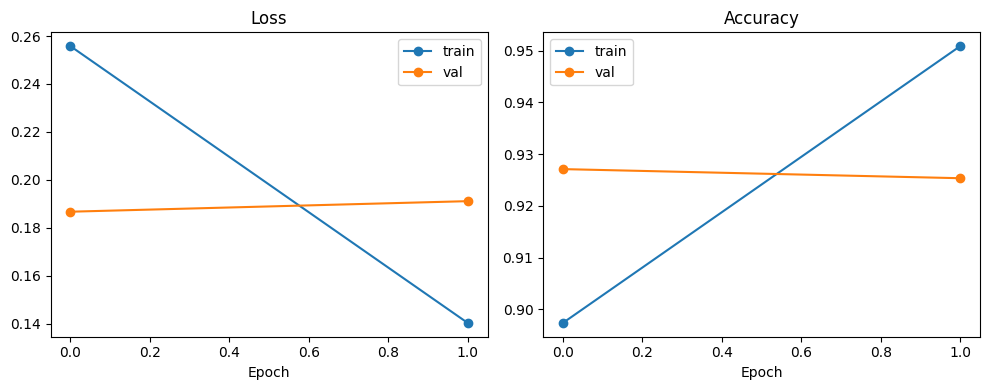

1563/1563 [==============================] - 497s 317ms/step
Confusion matrix:
 [[11137  1363]
 [  503 11997]]

Classification report:
               precision    recall  f1-score   support

           0     0.9568    0.8910    0.9227     12500
           1     0.8980    0.9598    0.9278     12500

    accuracy                         0.9254     25000
   macro avg     0.9274    0.9254    0.9253     25000
weighted avg     0.9274    0.9254    0.9253     25000



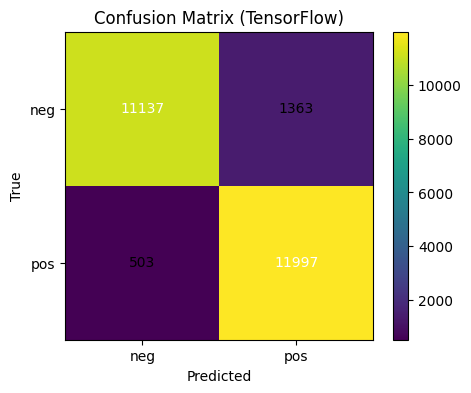

In [1]:
!pip install -q transformers datasets tensorflow scikit-learn matplotlib --upgrade

import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

MODEL_NAME = 'distilbert-base-uncased'
TF_OUTPUT_DIR = 'distilbert-imdb-tf'
BATCH_SIZE = 16
EPOCHS = 2
MAX_SAMPLES = None

raw_ds = load_dataset('imdb')
if MAX_SAMPLES:
    raw_ds['train'] = raw_ds['train'].select(range(MAX_SAMPLES))
    raw_ds['test'] = raw_ds['test'].select(range(int(MAX_SAMPLES/5)))

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

def encode(examples):
    return tokenizer(examples['text'], truncation=True, max_length=512, padding='max_length')

encoded_train = raw_ds['train'].map(encode, batched=True)
encoded_test = raw_ds['test'].map(encode, batched=True)

train_dataset = encoded_train.to_tf_dataset(
    columns=['input_ids', 'attention_mask'],
    label_cols=['label'],
    shuffle=True,
    batch_size=BATCH_SIZE
)

val_dataset = encoded_test.to_tf_dataset(
    columns=['input_ids', 'attention_mask'],
    label_cols=['label'],
    shuffle=False,
    batch_size=BATCH_SIZE
)

tf_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2, use_safetensors=False)


optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

tf_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = tf_model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o', label='train')
plt.plot(history.history['val_loss'], marker='o', label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], marker='o', label='train')
plt.plot(history.history['val_accuracy'], marker='o', label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('training_plots_tf.png')
plt.show()

preds = tf_model.predict(val_dataset)
pred_labels = np.argmax(preds.logits, axis=-1)
true_labels = np.concatenate([y for x,y in val_dataset], axis=0)

cm = confusion_matrix(true_labels, pred_labels)
print('Confusion matrix:\n', cm)
print('\nClassification report:\n', classification_report(true_labels, pred_labels, digits=4))

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix (TensorFlow)')
plt.colorbar()
classes = ['neg','pos']
plt.xticks([0,1], classes)
plt.yticks([0,1], classes)
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center', color='white' if cm[i,j]>cm.max()/2 else 'black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_tf.png')
plt.show()